In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#loading datasets

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

In [4]:
#converting to DataFrame

df = pd.DataFrame(data.data, columns = data.feature_names)

In [5]:
#splitting data into train and test splits

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle



X_train, X_test, y_train, y_test = train_test_split(*shuffle(df['Longitude'].to_frame(), data.target), test_size= 0.1)

In [6]:
#checking the shape of all
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18576, 1)
(2064, 1)
(18576,)
(2064,)


In [7]:
#using GridSearchCV checking and choosing hyperparameters optimally

from sklearn.model_selection import GridSearchCV
from sklearn import tree

model = tree.DecisionTreeRegressor()

gs = GridSearchCV( model,
                 {'max_depth': range(1,15),
                 'min_samples_split': range(10,110,10)},
                 cv = 5,
                 n_jobs = 2,
                 scoring = 'neg_mean_squared_error')


gs.fit( X_train, y_train)


# this gives the optimal case where grid search gives the hyperparameters
print(gs.best_params_)

{'max_depth': 10, 'min_samples_split': 100}


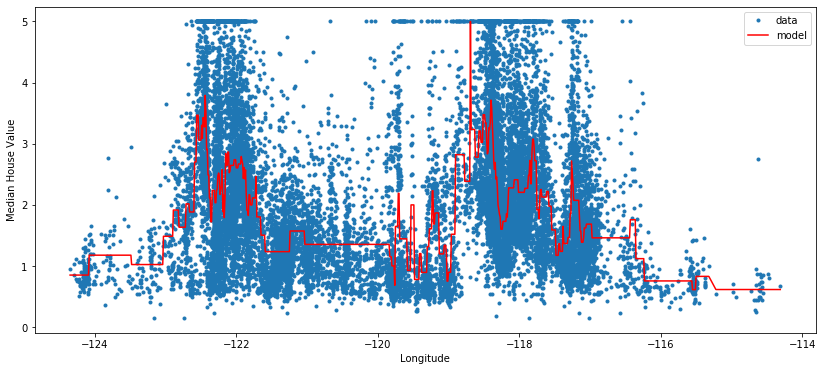

In [10]:
from sklearn.metrics import mean_squared_error as mse

model = gs.best_estimator_
model.fit(X_train, y_train)

#plotting

plt.figure(figsize= [14,6])
plt.plot(df['Longitude'], data.target, '.', label = 'data')
plt.plot(df['Longitude'].sort_values(), model.predict(df['Longitude'].sort_values().to_frame()), 'r-', label='model')
plt.xlabel('Longitude')
plt.ylabel('Median House Value')
plt.legend()